# Task 1. Experimental time complexity analysis

In [102]:
from time import process_time
import numpy as np
import matplotlib.pyplot as plt
from collections.abc import Callable
from typing import Any
from functools import partial
from scipy.optimize import curve_fit

In [124]:
import random

def vector(n: int) -> list[float]:
    return [random.uniform(0, 1) for _ in range(n)]

# Returns an array where each element represents the execution time of the given function
def measure(n: int, fn: Callable[[list[float]], Any]) -> list[float]:
    # For each iteration k:
    #                       1) Generate vector of length k
    #                       2) Measure current CPU time
    #                       3) Evaluate function
    #                       4) Measure current CPU time
    tmp = [[v := vector(k), process_time(), fn(v), process_time()] for k in range(1, n)]
    
    # CPU time diff
    return [each[3] - each[1] for each in tmp]

def metrics(times: int, measure_fn: Callable[[], list[float]]) -> list[float]:
    measurements = np.array([measure_fn() for _ in range(times)])
    
    return {
        'measurements': measurements,
        'average': np.average(measurements, axis=0),
        'median': np.median(measurements, axis=0),
        'variance': np.var(measurements, axis=0)
    }

def plot(metrics: dict, theoretical: Callable) -> None:
    x = range(1, len(metrics['average']) + 1)
    
    # Find parameters for theoretical approximation function O
    args, _ = curve_fit(theoretical, x, metrics['average'])
    theoretical_values = theoretical(x, *args)
    
    fig = plt.figure(figsize=(15, 5), dpi=100)
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(metrics['average'], label='Average')
    ax.plot(metrics['median'], label='Median', linestyle='dotted')
    ax.plot(theoretical_values, label='Theoretical approximation', color='red', linewidth=0.7)
    ax.set_xlabel('Data structure size ($n$)')
    ax.set_ylabel('Execution time (seconds)')
    ax.legend()
    
    #ax = fig.add_subplot(1, 2, 2)
    
    #ax.boxplot(metrics['measurements'][:, ::200])

**I.** Generate an n-dimensional random vector $\boldsymbol{v}=[v_1, v_2, ..., v_n]$ with non-negative
elements. For $\boldsymbol{v}$, implement the following calculations and algorithms:

1) $f(\boldsymbol{v}) = const$ (constant function)

In [75]:
def fn_const(v: list[float]) -> float:
    return 1

In [97]:
def O_1(x, k):
    return [k for _ in x]

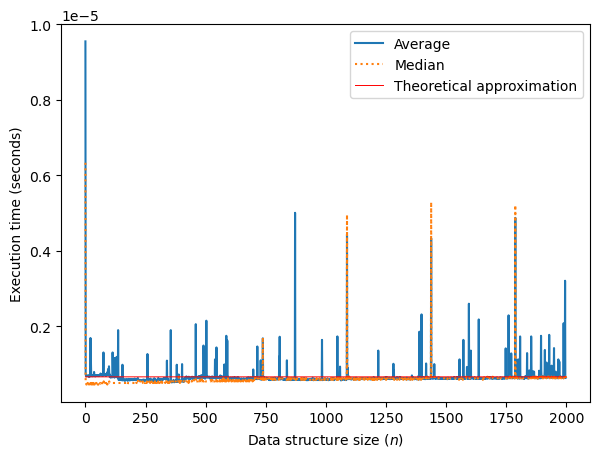

In [125]:
m = metrics(5, partial(measure, 2000, fn_const))

plot(m, O_1)

2) $f(\boldsymbol{v}) = \sum_{k=1}^{n} v_k$ (the sum of elements)

In [77]:
def fn_sum(v: list[float]) -> float:
    r = 0
    
    for v_k in v:
        r += v_k
    
    return r

In [116]:
def O_n(x, k):
    return [k * x_i for x_i in x]

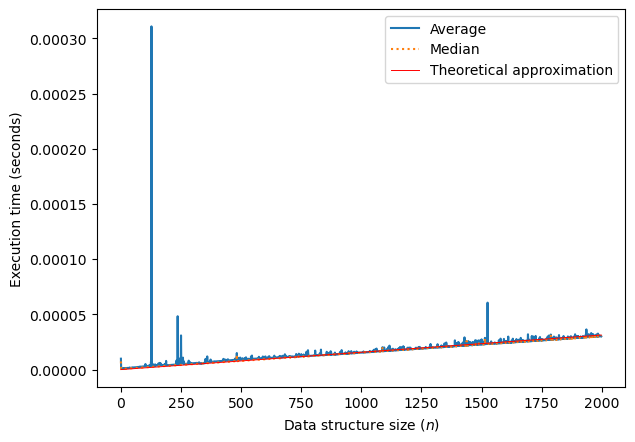

In [126]:
m = metrics(5, partial(measure, 2000, fn_sum))

plot(m, O_n)

3) $f(\boldsymbol{v}) = \prod_{k=1}^{n} v_k$ (the product of elements)

In [79]:
def fn_product(v: list[float]) -> float:
    r = 1
    
    for v_k in v:
        r *= v_k
    
    return r

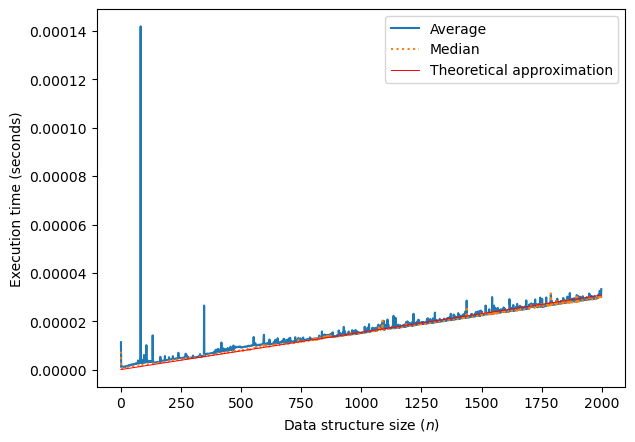

In [127]:
m = metrics(5, partial(measure, 2000, fn_product))

plot(m, O_n)

4) supposing that the elements of $\boldsymbol{v}$ are the coefficients of a polynomial $P$ of degree $n - 1$, calculate the value $P(1.5)$ by a direct calculation of $P(x) = \sum_{k=1}^{n} v_k x^{k-1}$ (i.e. evaluating each term one by one) and by Horner’s method by representing the polynomial as $P(x) = v_1 + x (v_2 + x (v_3 + ...))$

In [81]:
def fn_polinomial(x: float, v: list[float]) -> float:
    p = 0
    
    # k indexed from 0
    for k, v_k in enumerate(v):
        p += v_k * (x ** k)
    
    return p

def fn_horner(x: float, v: list[float]) -> float:
    p = v[-1]
    k = len(v) - 2
    while k >= 0:
        p = p * x + v[k]
        k -= 1
    
    return p

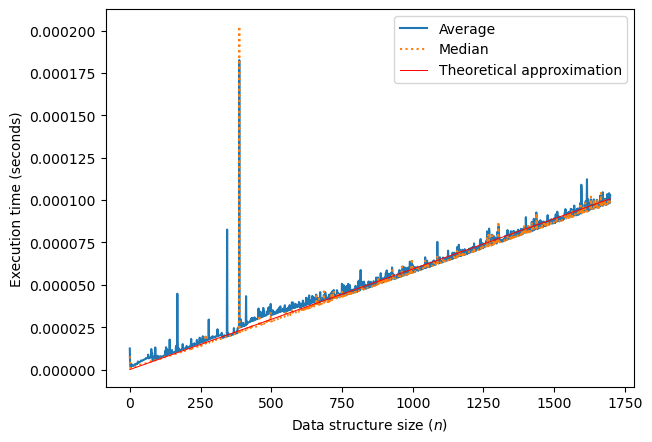

In [128]:
# Only 1700 max size because larger values cause to ariphmetic overflow and throw 'Numerical result out of range'
m = metrics(5, partial(measure, 1700, partial(fn_polinomial, 1.5)))

plot(m, O_n)

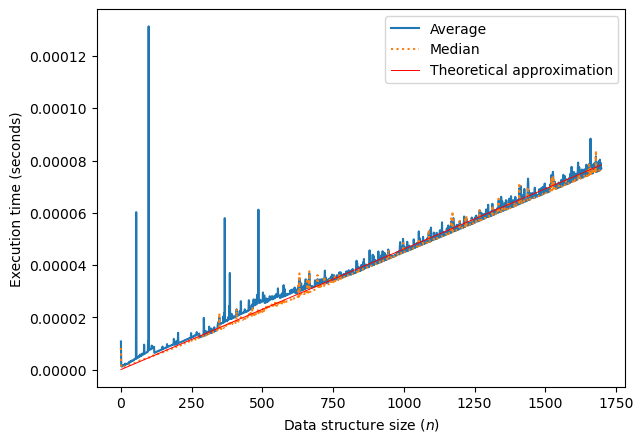

In [129]:
# Only 1700 max size because larger values cause to ariphmetic overflow and throw 'Numerical result out of range'
m = metrics(5, partial(measure, 1700, partial(fn_horner, 1.5)))

plot(m, O_n)

5) Bubble Sort of the elements of $\boldsymbol{v}$

In [134]:
def fn_bubblesort(v: list[float]) -> None:
    n = len(v)
    at_least_once = False
    
    for i in range(n-1):
        for j in range(0, n-i-1):
            if v[j] > v[j + 1]:
                at_least_once = True
                v[j], v[j + 1] = v[j + 1], v[j]
         
        if not at_least_once:
            return

In [132]:
def O_n_squared(x, k):
    return [k * x_i ** 2 for x_i in x]

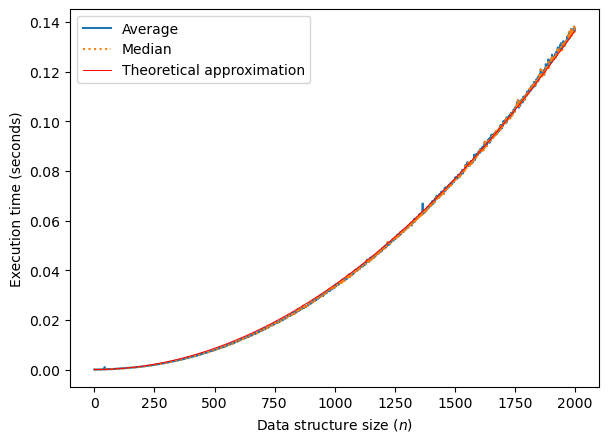

In [135]:
m = metrics(5, partial(measure, 2000, fn_bubblesort))

plot(m, O_n_squared)

6) Quick Sort of the elements of $\boldsymbol{v}$

In [138]:
def fn_quicksort(v: list[float]) -> None:
    np.sort(v, kind='quicksort')

In [142]:
from math import log

def O_n_log_n(x, k):
    return [k * x_i * log(x_i) for x_i in x]

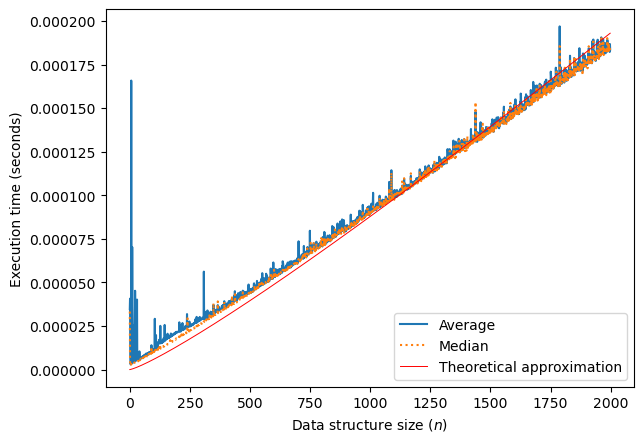

In [143]:
m = metrics(5, partial(measure, 2000, fn_quicksort))

plot(m, O_n_log_n)

7) Timsort of the elements of $\boldsymbol{v}$

In [88]:
def fn_timsort(v: list[float]) -> None:
    # Do not use np.sort(v, kind='stable') as it might choose mergesort (depends on data type)
    sorted(v)

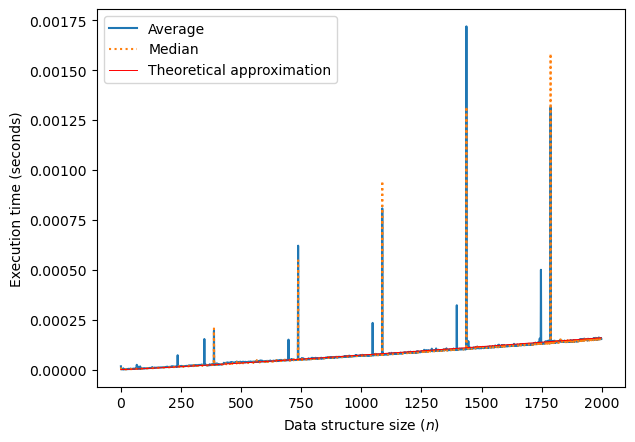

In [148]:
m = metrics(5, partial(measure, 2000, fn_timsort))

plot(m, O_n_log_n)

**II.** Generate random matrices $A$ and $B$ of size $n$ × $n$ with non-negative elements. Find the usual matrix product for $A$ and $B$.

In [90]:
def matrix(n: int) -> list[list[float]]:
    return [vector(n) for _ in range(n)]

def fn_matrix_product(A: list[list[float]], B: list[list[float]]) -> list[list[float]]:
    C = []
    for i in range(0, len(A)):
        temp = []
        for j in range(0, len(B[0])):
            s = 0
            for k in range(0, len(A[0])):
                s += A[i][k] * B[k][j]
            temp.append(s)
        C.append(temp)
    
    return C

In [144]:
def O_n_cubed(x, k):
    return [k * x_i ** 3 for x_i in x]

In [91]:
# Returns an array where each element represents the execution time of the given function
def measure_matrix(n: int, fn: Callable[[list[list[float]], list[list[float]]], Any]) -> list[float]:
    # For each iteration k:
    #                       1) Generate first matrix A of size k*k
    #                       2) Generate second matrix B of size k*k
    #                       3) Measure current CPU time
    #                       4) Evaluate function
    #                       5) Measure current CPU time
    tmp = [[A := matrix(k), B := matrix(k), process_time(), fn(A, B), process_time()] for k in range(1, n)]
    
    # CPU time diff
    return [each[4] - each[2] for each in tmp]

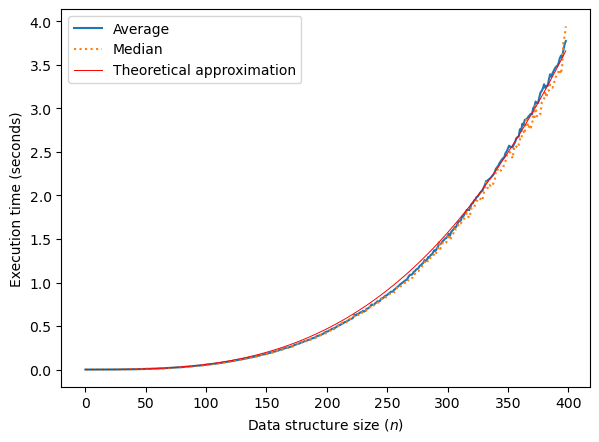

In [151]:
m = metrics(5, partial(measure_matrix, 400, fn_matrix_product))

plot(m, O_n_cubed)